Import packages.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('./final_result_impl_histogram.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

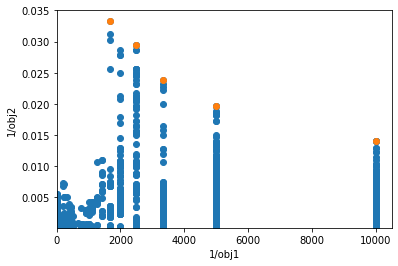

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


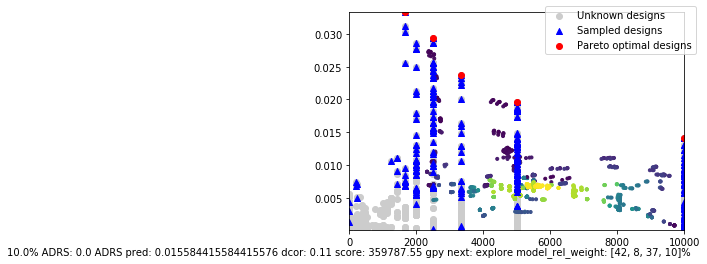

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.1),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([1336, 1354, 1324, 1655, 1421, 2963, 2738,   74, 2783, 2965,  369,
       2828, 2648, 2426,   73, 1887,    0,   30,  302,    2,  279,    1,
         96,   93,    3,  372, 2470, 1089,  330,   97,  186,  348,   33,
       2929,   98,    4,  187,   99, 1928, 2469,  414, 2876, 2516, 2606,
       1092, 2291, 1433,  381,    6,  552,  558,  382,  373,  384, 2471,
       1931, 1751,  390,  378,  383,  374,  554,  561, 2921, 1269, 2474,
       2475,  379,    5,  281,  189,  100, 1101,  188,  280,  101,  282,
        190,  283,  284, 2468, 1754,  375,  191,  732,  912,  915,  733,
        555, 1757, 1755, 1095,    9,   12,   11, 2473, 2522,   10,  914,
        195,  102,  913, 1752,  285,  192,  103,  196,    8,  286,  287,
        553,    7,   14,  288,  104,  194,  197,  376,  377,  193,  734,
        917,  556,  735,  210,  918,  736, 1241,  380,  290,  738,  557,
        303,   13,  559,  916,  385,   35, 1753, 1756,  198, 1094, 1093,
       1097,  737, 1591,  289,  305,  387,  567, 12